# Bài tập 3.4: Sử dụng PCA sklearn để giảm chiều dữ liệu hình ảnh
- Sử dụng bộ dữ liệu các khuôn mặt của sklearn (datasets.fetch_lfw_people)
- Áp dụng PCA để giảm chiều dữ liệu từ 2914 chiều xuống còn 150 chiều
- Hiển thị hình ảnh gốc và sau khi giảm chiều


> Cập nhật: **02/2023**



In [1]:
## Thư viện
import matplotlib.pyplot   as plt
import numpy               as np
import pandas              as pd
import seaborn             as sns

from sklearn.decomposition import PCA

In [2]:
## Load dữ liệu khuôn mặt của sklearn
from sklearn.datasets import fetch_lfw_people

m     = 40  # Số hình ảnh mẫu cho mỗi nhân vật (40)
faces = fetch_lfw_people(min_faces_per_person = m)

## Dữ liệu của các hình ảnh
images = faces.images

## Nhãn số của các hình
labels = faces.target

## Nhãn tên của các hình
names = faces.target_names

In [3]:
## Xem thông tin dữ liệu
print('* Tên các nhân vật:\n', names)
print('* Số lượng hình ảnh:', images.shape[0])
print('* Kích thước hình ảnh:', images.shape[1:3], '-->', images.shape[1] * images.shape[2])

* Tên các nhân vật:
 ['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
* Số lượng hình ảnh: 1867
* Kích thước hình ảnh: (62, 47) --> 2914


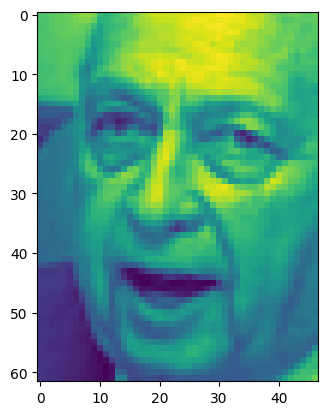

Hình của: Ariel Sharon


In [4]:
## Hiển thị hình ảnh tại index = i
i   = 180
img = images[i]
plt.imshow(img)
plt.show()
print('Hình của:', names[labels[i]])

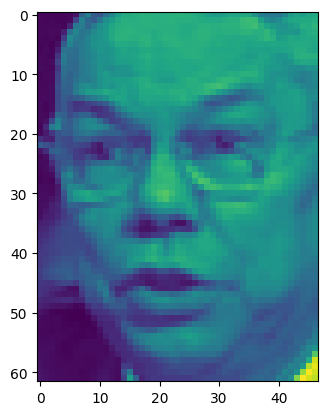

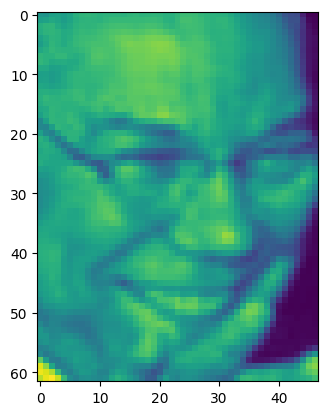

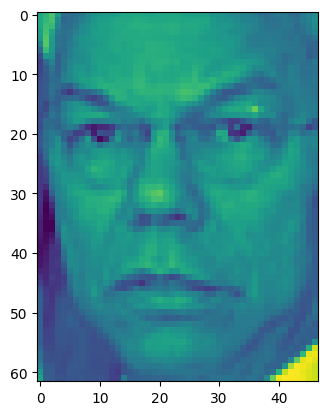

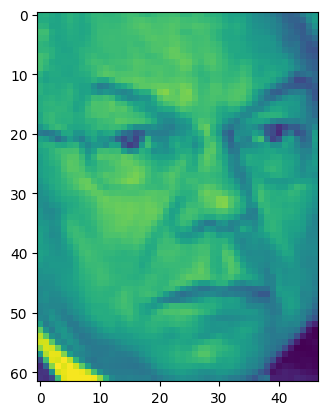

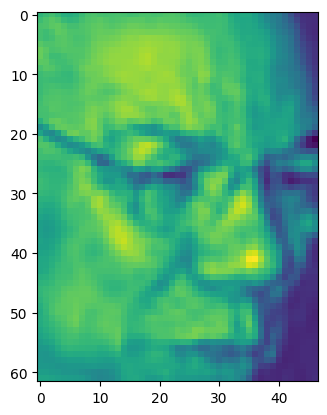

In [5]:
## Hiển thị 5 ảnh đầu tiên của Colin Powell (label = 2)
label = 2
for img in images[labels == label][:5]:
    plt.imshow(img)
    plt.show()

In [6]:
## Áp dụng PCA giảm xuống còn k chiều
k   = 300
pca = PCA(k)
pca.fit(faces.data)

PCA(n_components=300)

In [7]:
## Tỷ lệ % phương sai tích lũy còn giữ lại
sum(pca.explained_variance_ratio_)

0.9728348283824744

In [8]:
## Phép chiếu vào không gian mới (k chiều)
components = pca.transform(faces.data)
projected  = pca.inverse_transform(components) ## Chiếu lại về không gian ban đầu (ảnh)

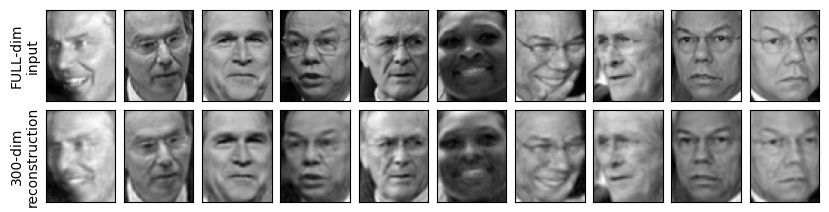

In [9]:
## Hiển thị kết quả
fig, ax = plt.subplots(2, 10, figsize = (10, 2.5),
                       subplot_kw = {'xticks':[], 'yticks':[]},
                       gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47),  cmap = 'binary_r')

ax[0, 0].set_ylabel('FULL-dim\ninput')
ax[1, 0].set_ylabel(str(k) + '-dim\nreconstruction')
plt.show()